<a href="https://colab.research.google.com/github/Quezia-Moura/TrabalhoP1_Probabilidade-e-Estatistica/blob/main/Analise_Estatistica_Olimpiadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise das Olimpíadas

##Configurações Iniciais

###Importação das bibliotecas necessárias

In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Carregamento dos dados

In [ ]:
path = kagglehub.dataset_download("heesoo37/120-years-of-olympic-history-athletes-and-results")

data = pd.read_csv(path + "/athlete_events.csv")

###Configurações gerais para gráficos

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 7)

##Analise Descritiva

In [ ]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
print("Dados Gerais:\n", data.describe(include="all"))
print("\n")
print("\nValores Nulos:\n", data.isnull().sum())


Dados Gerais:
                    ID                  Name     Sex            Age  \
count   271116.000000                271116  271116  261642.000000   
unique            NaN                134732       2            NaN   
top               NaN  Robert Tait McKenzie       M            NaN   
freq              NaN                    58  196594            NaN   
mean     68248.954396                   NaN     NaN      25.556898   
std      39022.286345                   NaN     NaN       6.393561   
min          1.000000                   NaN     NaN      10.000000   
25%      34643.000000                   NaN     NaN      21.000000   
50%      68205.000000                   NaN     NaN      24.000000   
75%     102097.250000                   NaN     NaN      28.000000   
max     135571.000000                   NaN     NaN      97.000000   

               Height         Weight           Team     NOC        Games  \
count   210945.000000  208241.000000         271116  271116       27

###Tratamento de Valores Ausentes


Para melhorar a qualidade dos dados e evitar vieses nos resultados, vamos preencher os valores ausentes.
Usamos a mediana para 'Age' (menos sensível a outliers) e a média para 'Height' e 'Weight', por grupo de 'Sport' e 'Sex'

In [ ]:
data['Age'] = data.groupby(['Sport', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [ ]:
data['Height'] = data.groupby(['Sport', 'Sex'])['Height'].transform(lambda x: x.fillna(x.mean()))
data['Weight'] = data.groupby(['Sport', 'Sex'])['Weight'].transform(lambda x: x.fillna(x.mean()))

###Análise de Outliers

Utilizamos um boxplot para visualizar os outliers, especialmente para a idade dos atletas.
Idades acima de 65 anos são consideradas atípicas, pois a maioria dos atletas olímpicos é jovem.
Removemos os registros com idade acima de 65 anos para evitar distorções.

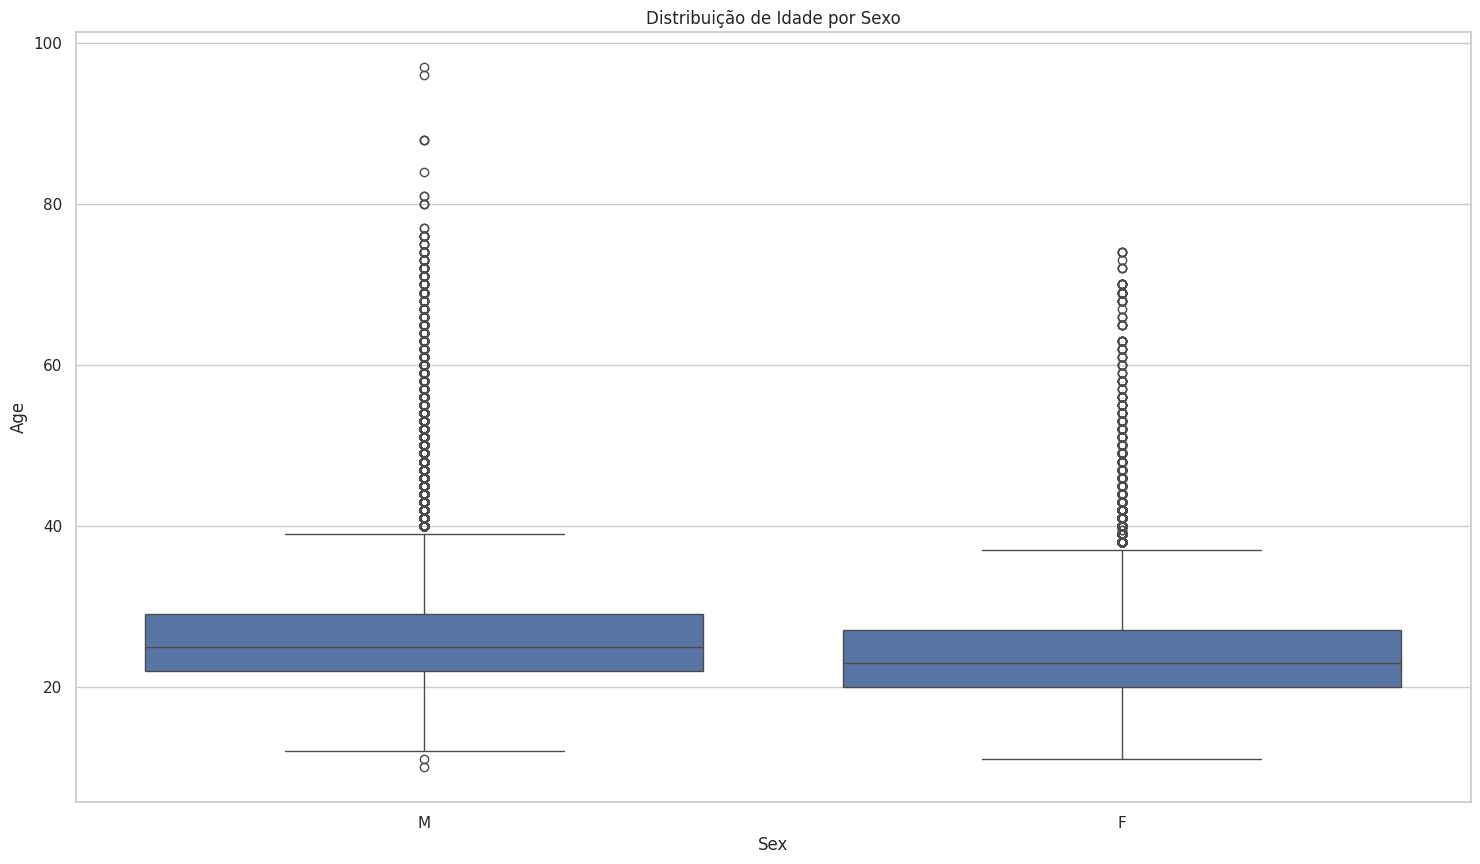

In [ ]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=data, x='Sex', y='Age')
plt.title("Distribuição de Idade por Sexo")
plt.show()

Definindo limite superior para idade (65 anos) e filtrando dados

In [ ]:
outlier_threshold = 65
data = data[data['Age'] <= outlier_threshold]

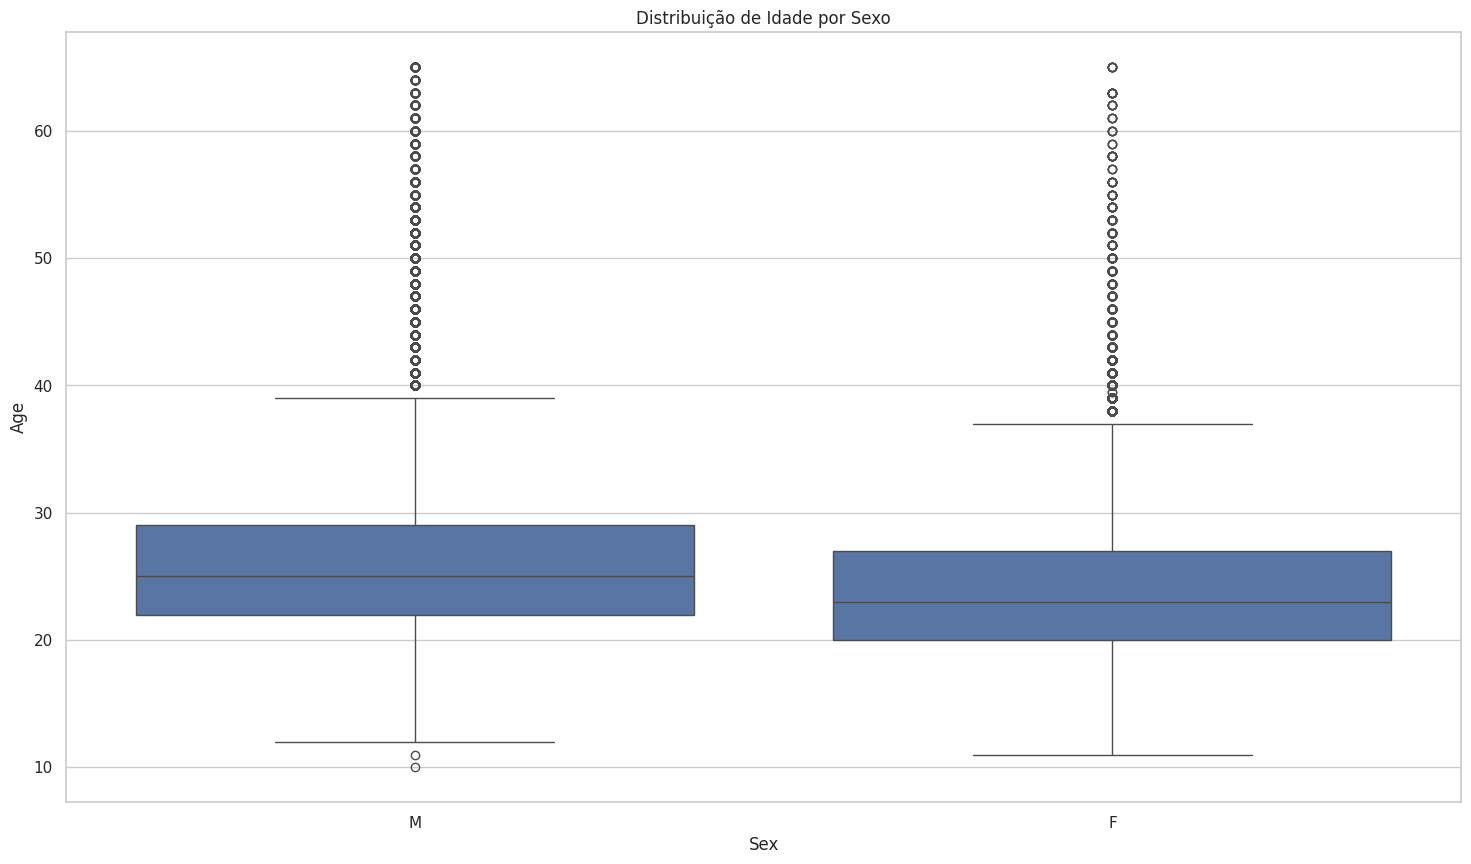

In [ ]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=data, x='Sex', y='Age')
plt.title("Distribuição de Idade por Sexo")
plt.show()

###Análise Demográfica e Estatísticas Básicas

Após tratar os valores ausentes e outliers, exploramos as distribuições de idade, altura e peso para verificar a conformidade dos dados e entender a demografia dos atletas.

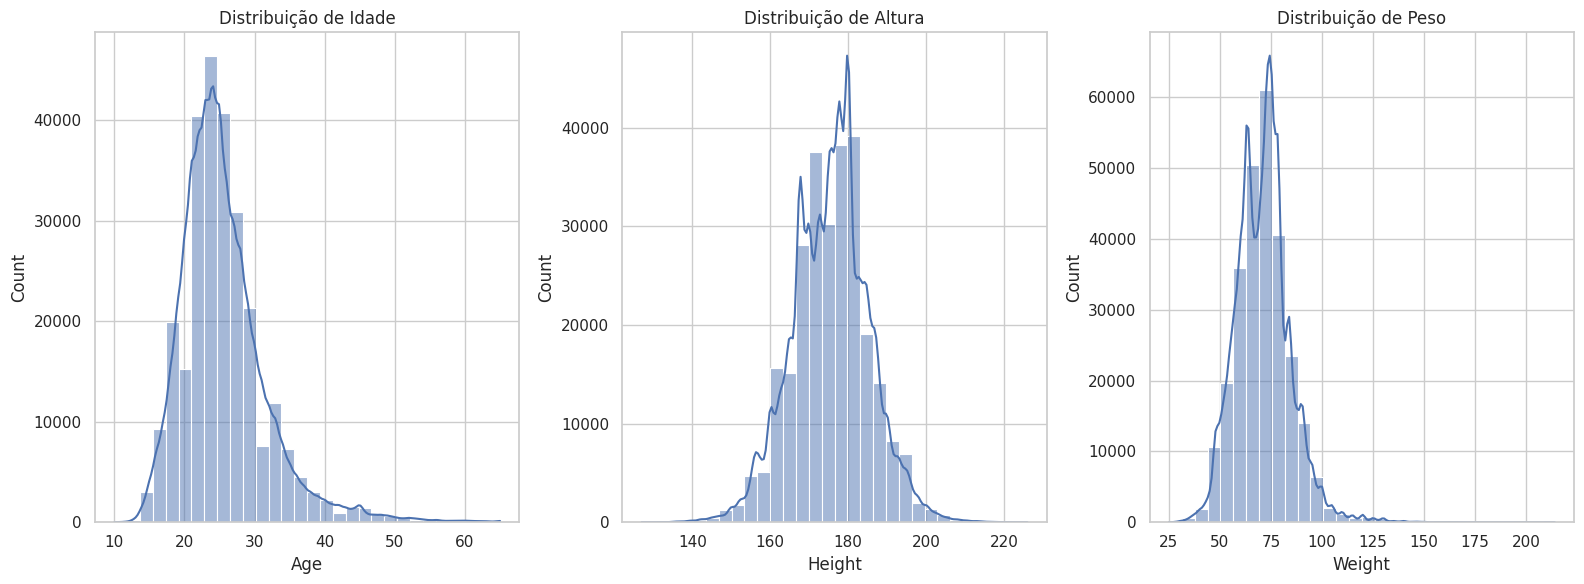

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.histplot(data=data, x='Age', kde=True, bins=30).set_title('Distribuição de Idade')
plt.subplot(1, 3, 2)
sns.histplot(data=data, x='Height', kde=True, bins=30).set_title('Distribuição de Altura')
plt.subplot(1, 3, 3)
sns.histplot(data=data, x='Weight', kde=True, bins=30).set_title('Distribuição de Peso')
plt.tight_layout()
plt.show()

In [ ]:
print("Dados Gerais:\n", data.describe(include="all"))
print("\n")
print("\nValores Nulos:\n", data.isnull().sum())

Dados Gerais:
                    ID                  Name     Sex            Age  \
count   270846.000000                270846  270846  270846.000000   
unique            NaN                134652       2            NaN   
top               NaN  Robert Tait McKenzie       M            NaN   
freq              NaN                    52  196369            NaN   
mean     68253.285384                   NaN     NaN      25.550926   
std      39024.456456                   NaN     NaN       6.206584   
min          1.000000                   NaN     NaN      10.000000   
25%      34644.000000                   NaN     NaN      22.000000   
50%      68209.000000                   NaN     NaN      25.000000   
75%     102106.750000                   NaN     NaN      28.000000   
max     135571.000000                   NaN     NaN      65.000000   

               Height         Weight           Team     NOC        Games  \
count   270746.000000  270292.000000         270846  270846       27

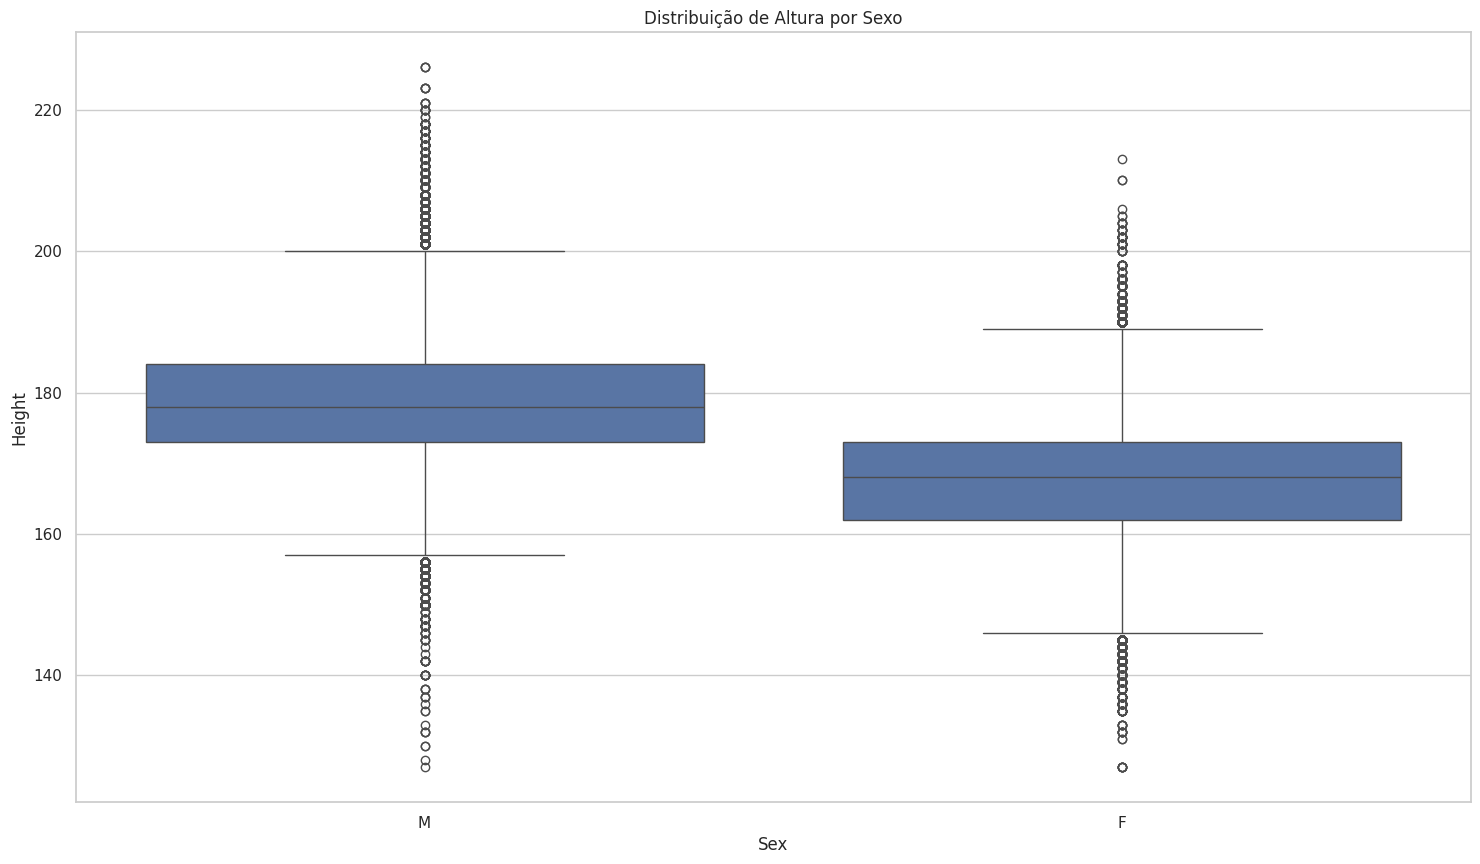

In [ ]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=data, x='Sex', y='Height')
plt.title("Distribuição de Altura por Sexo")
plt.show()

##Análise de Participação Olímpica ao Longo dos Anos

Neste gráfico de linha, visualizamos o número de atletas que participaram das Olimpíadas ao longo dos anos.
A análise é segmentada por temporada (verão e inverno) para verificar tendências de participação.

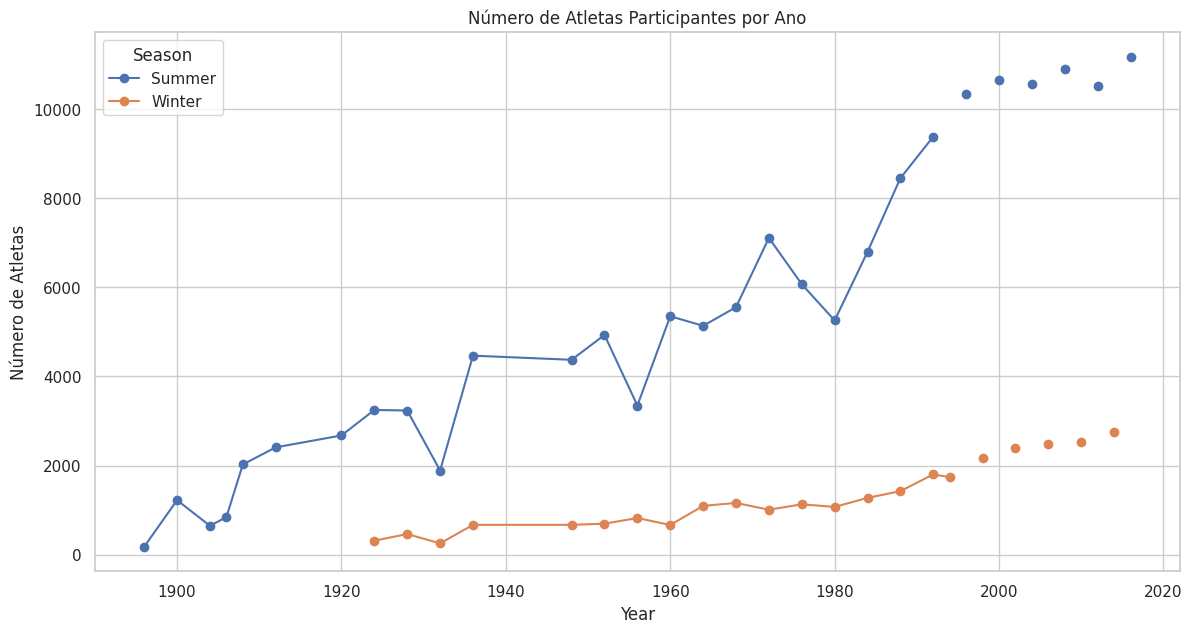

In [ ]:
participacao_por_ano = data.groupby(['Year', 'Season'])['ID'].nunique().unstack()
participacao_por_ano.plot(kind='line', marker='o')
plt.title("Número de Atletas Participantes por Ano")
plt.ylabel("Número de Atletas")
plt.show()

###Análise de Atletas por País (Top 10)

Aqui, analisamos os países com o maior número de atletas olímpicos.
Esse gráfico nos ajuda a identificar quais países historicamente tiveram mais representação nos jogos.

<ipython-input-39-ea6b5792ae50>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_teams.index, x=top_teams.values, palette="viridis")


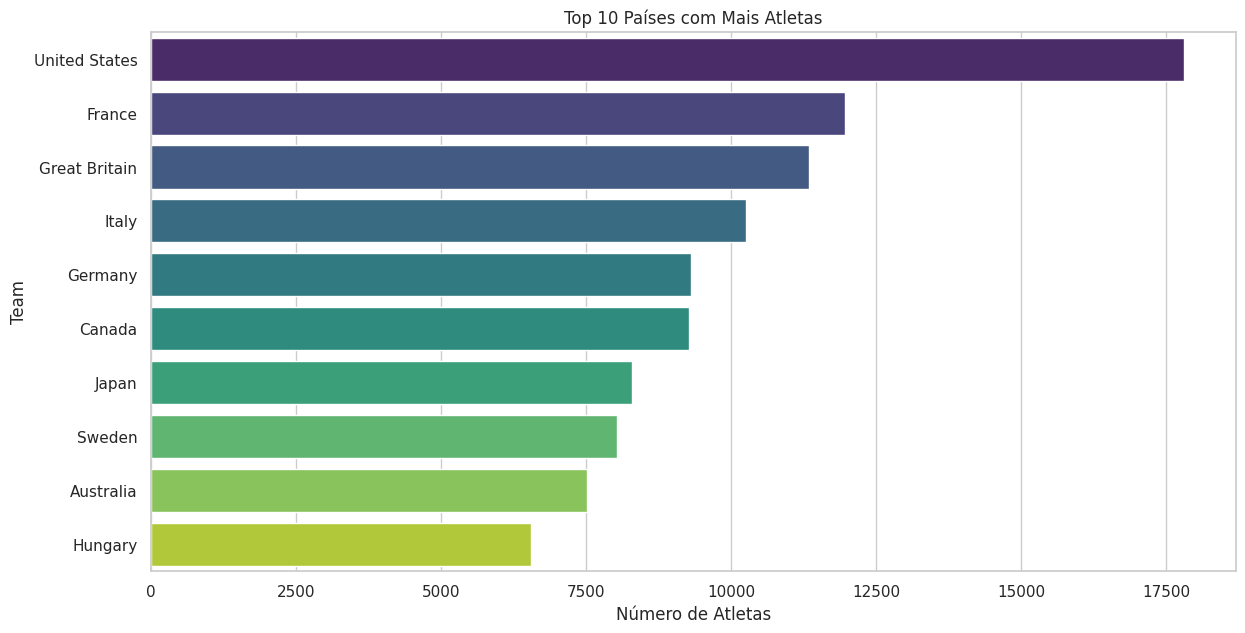

In [ ]:
top_teams = data['Team'].value_counts().head(10)
sns.barplot(y=top_teams.index, x=top_teams.values, palette="viridis")
plt.title("Top 10 Países com Mais Atletas")
plt.xlabel("Número de Atletas")
plt.show()

Visualizamos os 10 países com mais medalhas na história olímpica.

<ipython-input-40-73b48c94339b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=medalha_por_pais.index, x=medalha_por_pais.values, palette="magma")


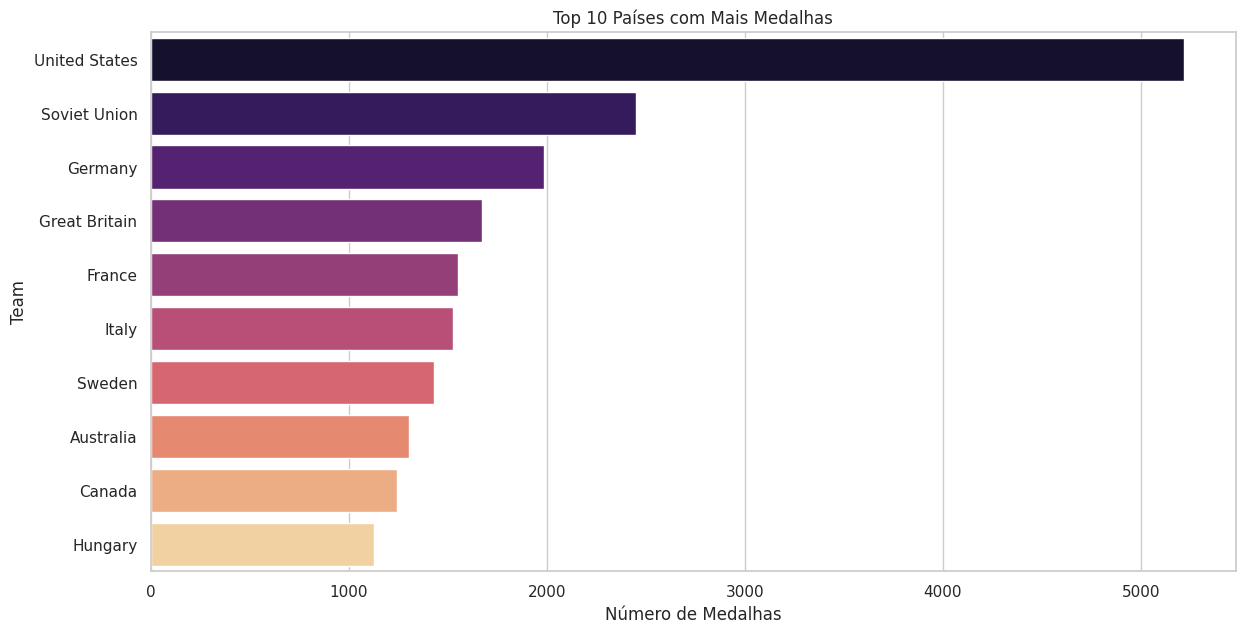

In [ ]:
medalha_por_pais = data[data['Medal'].notna()]['Team'].value_counts().head(10)
sns.barplot(y=medalha_por_pais.index, x=medalha_por_pais.values, palette="magma")
plt.title("Top 10 Países com Mais Medalhas")
plt.xlabel("Número de Medalhas")
plt.show()

###Análise de Medalhas

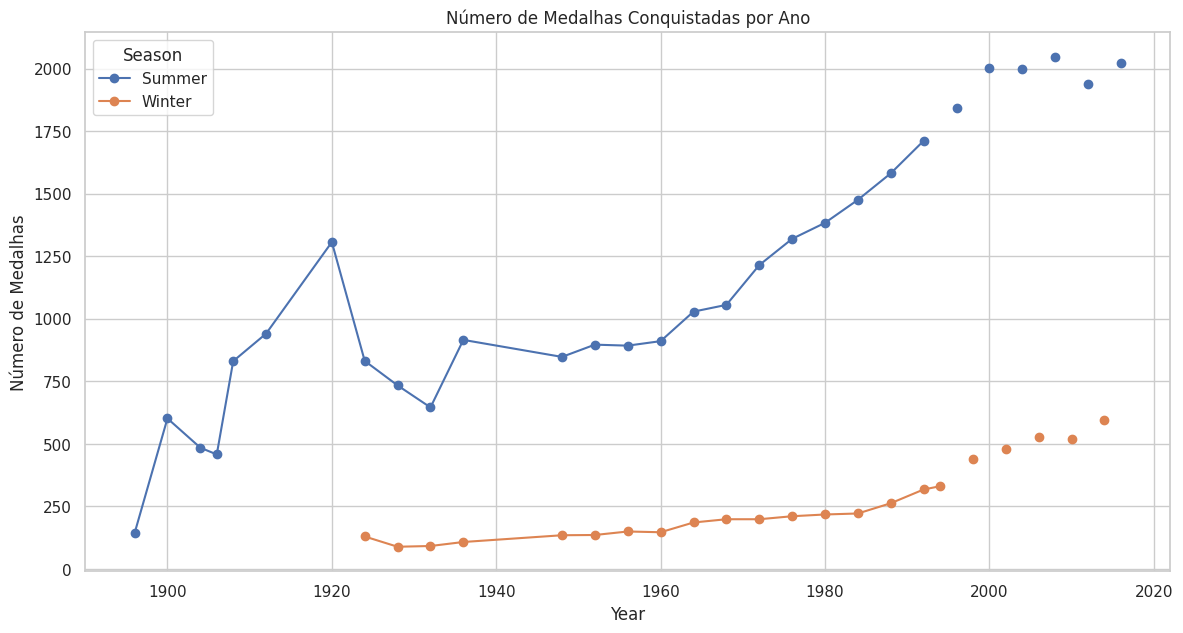

In [ ]:
medalhas_por_ano = data[data['Medal'].notna()].groupby(['Year', 'Season'])['Medal'].count().unstack()
medalhas_por_ano.plot(kind='line', marker='o')
plt.title("Número de Medalhas Conquistadas por Ano")
plt.ylabel("Número de Medalhas")
plt.show()


##Analise de Peso e Altura por Esporte

Nesta análise, examinamos a variável height (altura) dos atletas, agrupando-os por esporte para observar quais apresentam as maiores e menores alturas médias. O objetivo é identificar os cinco esportes com as maiores médias de altura e os cinco com as menores, e visualizar isso por meio de um boxplot.

In [ ]:
df_filtered = data[['Sport', 'Weight']].dropna()

# Calculate the average weight per sport
avg_weight_per_sport = df_filtered.groupby('Sport').mean().sort_values(by='Weight', ascending=False)

# Select the top 5 sports with the highest and lowest average weights
top_5_highest_avg = avg_weight_per_sport.head(5)
top_5_lowest_avg = avg_weight_per_sport.tail(5)

# Filter the original dataset for only these top and bottom 5 sports
sports_to_include = pd.concat([top_5_lowest_avg, top_5_highest_avg]).index
df_filtered_top_bottom = df_filtered[df_filtered['Sport'].isin(sports_to_include)]

<ipython-input-49-47b77c54498d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_top_bottom['Sport'] = pd.Categorical(df_filtered_top_bottom['Sport'],


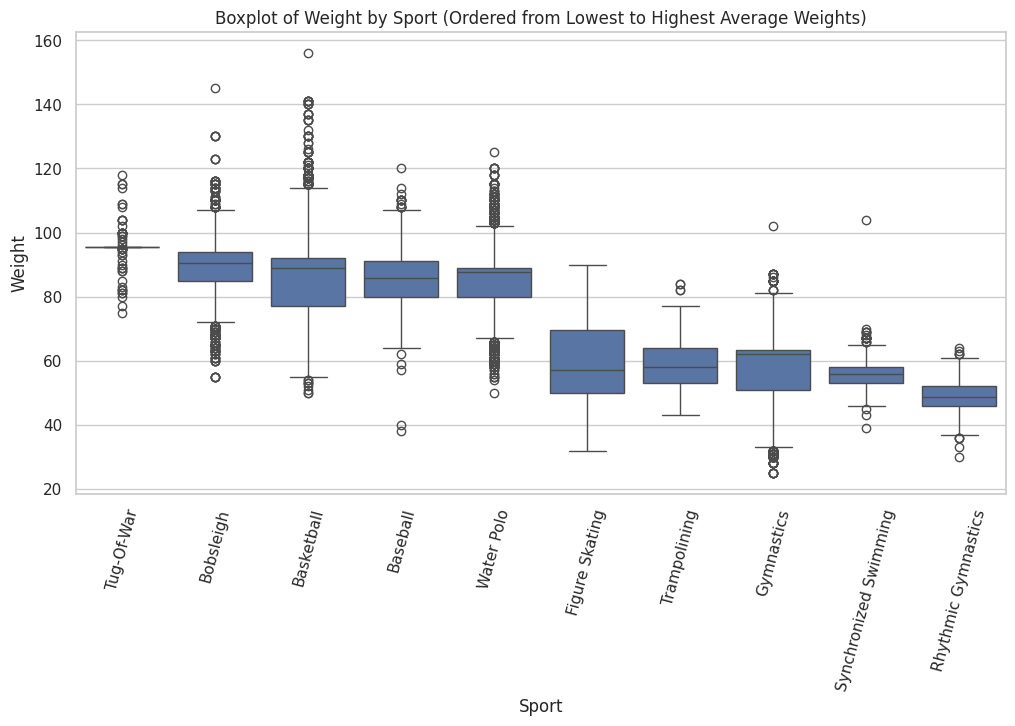

In [ ]:
df_filtered_top_bottom['Sport'] = pd.Categorical(df_filtered_top_bottom['Sport'],
                                                 categories=pd.concat([top_5_highest_avg, top_5_lowest_avg]).index,
                                                 ordered=True)

# Plot the boxplot again with the ordered sports
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sport', y='Weight', data=df_filtered_top_bottom)
plt.title('Boxplot of Weight by Sport')
plt.xticks(rotation=75)
plt.show()

<ipython-input-53-8d4a32e70e7d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_top_bottom_height['Sport'] = pd.Categorical(df_filtered_top_bottom_height['Sport'],


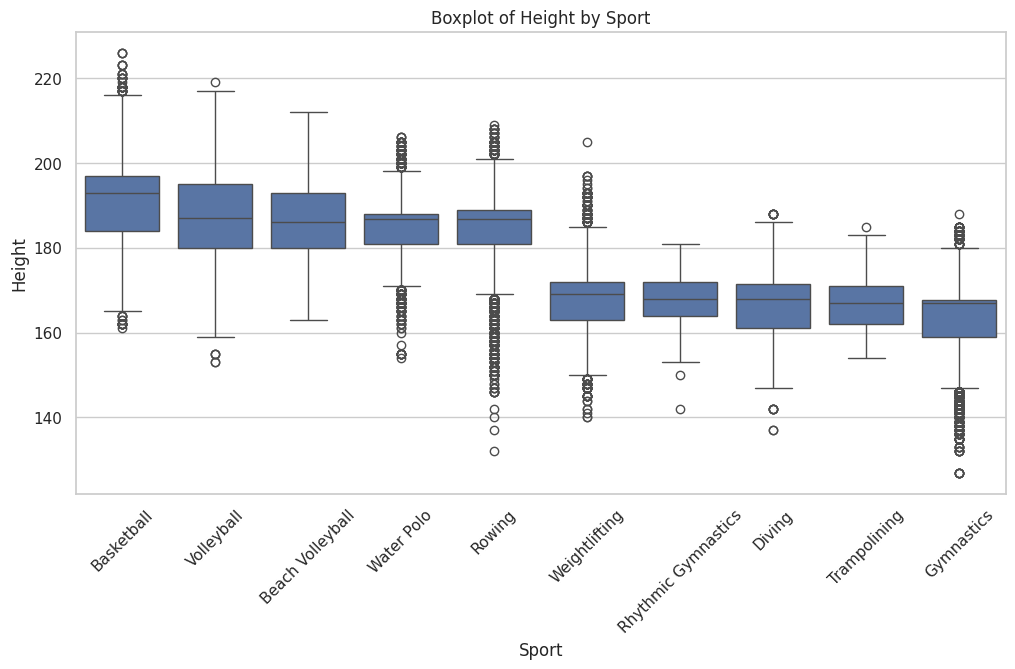

In [ ]:
# Filter data for non-null 'Height' values and group by 'Sport' to calculate the mean height per sport
df_filtered_height = data[['Sport', 'Height']].dropna()

# Calculate the average height per sport
avg_height_per_sport = df_filtered_height.groupby('Sport').mean().sort_values(by='Height', ascending=False)

# Select the top 5 sports with the highest and lowest average heights
top_5_highest_avg_height = avg_height_per_sport.head(5)
top_5_lowest_avg_height = avg_height_per_sport.tail(5)

# Filter the original dataset for only these top and bottom 5 sports
sports_to_include_height = pd.concat([top_5_highest_avg_height, top_5_lowest_avg_height]).index
df_filtered_top_bottom_height = df_filtered_height[df_filtered_height['Sport'].isin(sports_to_include_height)]

# Reorder the sports by average height from lowest to highest
df_filtered_top_bottom_height['Sport'] = pd.Categorical(df_filtered_top_bottom_height['Sport'],
                                                        categories=pd.concat([top_5_highest_avg_height, top_5_lowest_avg_height]).index,
                                                        ordered=True)

# Plot a boxplot of height by sport for these top and bottom 5 sports
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sport', y='Height', data=df_filtered_top_bottom_height)
plt.title('Boxplot of Height by Sport')
plt.xticks(rotation=45)
plt.show()


##Análise de Correlações

Analisamos a relação entre idade, altura, peso e a conquista de medalhas.
Usamos pairplots e boxplots para verificar como essas variáveis podem afetar as conquistas.

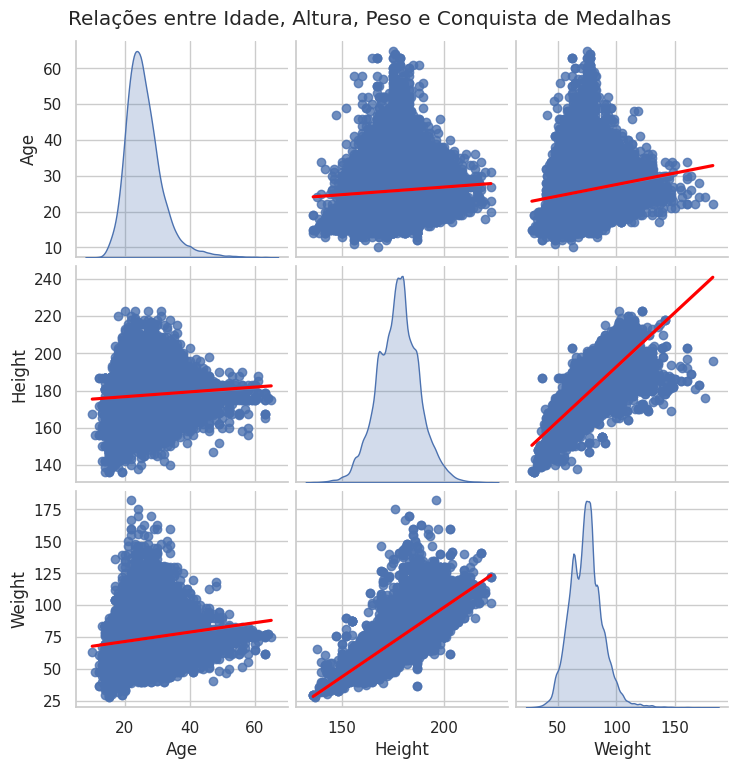

In [ ]:
athlete_medals = data[data['Medal'].notna()]
sns.pairplot(athlete_medals[['Age', 'Height', 'Weight']], kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle("Relações entre Idade, Altura, Peso e Conquista de Medalhas", y=1.02)
plt.show()

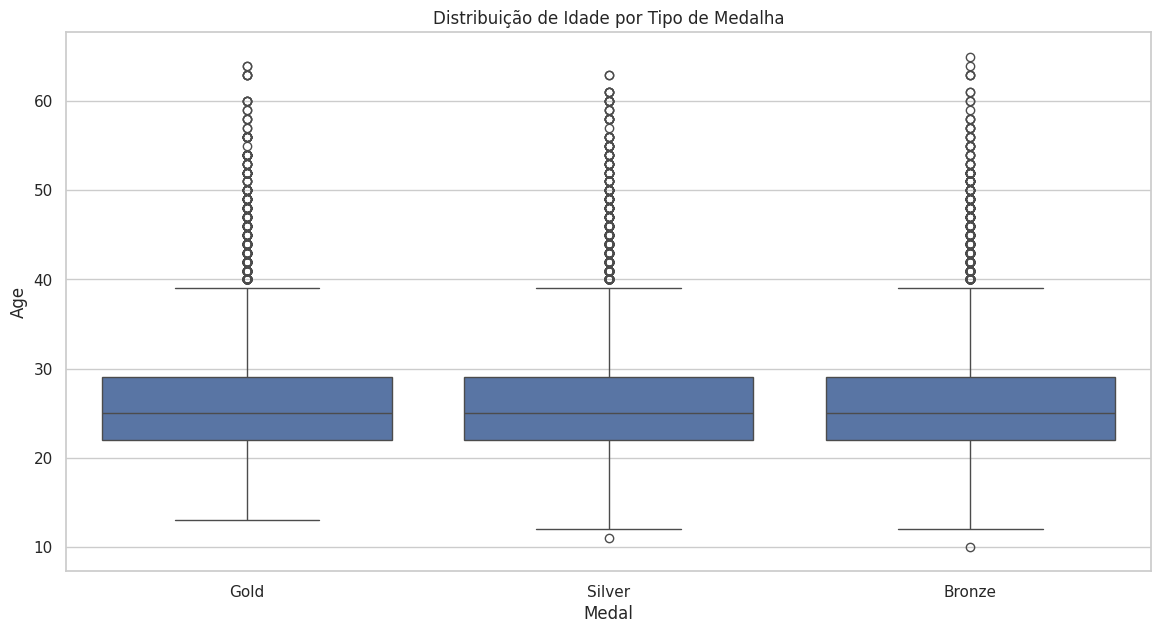

In [ ]:
sns.boxplot(data=athlete_medals, x='Medal', y='Age', order=['Gold', 'Silver', 'Bronze'])
plt.title("Distribuição de Idade por Tipo de Medalha")
plt.show()

Exibir estatísticas descritivas para atletas que ganharam medalhas

In [ ]:
print("\nDistribuição de Idade, Altura e Peso para Atletas que Ganharam Medalhas:")
print(athlete_medals[['Age', 'Height', 'Weight']].describe())


Distribuição de Idade, Altura e Peso para Atletas que Ganharam Medalhas:
                Age        Height        Weight
count  39772.000000  39697.000000  39607.000000
mean      25.917882    177.468799     73.865018
std        5.835160     10.152087     13.837551
min       10.000000    136.000000     28.000000
25%       22.000000    170.000000     64.000000
50%       25.000000    177.745402     73.839129
75%       29.000000    184.000000     82.000000
max       65.000000    223.000000    182.000000


##Considerações Finais e Análise dos Resultados

Esta análise dos dados olímpicos revela padrões e insights profundos sobre a demografia dos atletas, suas performances e a evolução das competições ao longo do tempo. Com a realização de diversas etapas, incluindo o tratamento de dados, detecção de outliers e uma investigação minuciosa dos atributos físicos dos atletas, identificamos várias tendências relevantes.

####Perfil Demográfico dos Atletas Olímpicos:

O perfil demográfico mostrou-se central para entender as diferenças entre modalidades e o impacto da idade na performance. A faixa etária predominante dos atletas está entre 20 e 30 anos, uma faixa considerada ótima para competições de alto rendimento. A análise revelou também que atletas com idade superior a 65 anos são casos isolados e, portanto, removê-los como outliers trouxe mais precisão na análise das características da idade, altura e peso. Em termos de altura e peso, observou-se que esses valores variam amplamente conforme o esporte, com modalidades como basquete e natação exigindo físicos mais específicos em comparação a outras, como a ginástica.

####Influência da Altura e Peso nas Características Físicas de Atletas por Esporte

A análise dos dados de altura mostrou que esportes como basquete e voleibol têm as maiores médias, onde a altura é uma vantagem competitiva clara. Já esportes como ginástica e levantamento de peso apresentaram as menores médias, refletindo a demanda por maior controle corporal e força relativa. O boxplot destacou tanto as diferenças entre as médias quanto a variabilidade dentro de cada esporte, indicando que, embora a altura seja importante em alguns esportes, há diversidade de perfis físicos entre os atletas.

A análise dos dados de peso revelou que esportes como Cabo de guerra e Bobsled apresentam as maiores médias, onde o peso elevado é uma vantagem para força e impacto. Por outro lado, esportes como ginástica e patinação artística têm as menores médias de peso, devido à necessidade de agilidade e leveza. O boxplot destacou as diferenças nas médias e a variação dentro de cada esporte, mostrando que, embora o peso seja crucial em algumas modalidades, há diversidade nas características físicas dos atletas dentro de cada esporte.

###Crescimento da Participação Olímpica

Observou-se um crescimento na participação olímpica ao longo das décadas, especialmente após 1950, que coincidiu com o aumento de países participantes e o interesse global pelos Jogos Olímpicos. Esse aumento representa não apenas uma maior inclusão, mas também uma tendência de profissionalização e maior alcance do espírito olímpico. A segmentação entre as edições de verão e inverno revela que, enquanto os Jogos de Verão atraem mais participantes, os Jogos de Inverno também têm mostrado um aumento gradual na participação, refletindo o desenvolvimento dos esportes de neve e gelo em várias regiões.

###Representação e Desempenho por País

Estados Unidos, Rússia e Alemanha aparecem como as nações com maior número de atletas e conquistas. Esses países, notadamente, têm um histórico de investimento significativo em programas esportivos, o que os coloca em vantagem nos Jogos. O número de medalhas por país reflete não apenas a quantidade de atletas, mas também o foco em modalidades nas quais esses países são tradicionalmente fortes. Além disso, países com recursos limitados ainda enfrentam desafios para competir em larga escala, sugerindo que apoio e desenvolvimento esportivo são fatores críticos para o sucesso.

####Correlações Entre Atributos e Conquista de Medalhas


A análise de correlações entre idade, altura, peso e a conquista de medalhas revelou algumas tendências interessantes. Notou-se que atletas medalhistas tendem a se concentrar em uma faixa etária menor, próxima ao pico da performance física. A altura e o peso dos medalhistas apresentaram leve correlação positiva, sugerindo que características físicas podem influenciar o desempenho dependendo da modalidade esportiva. No entanto, essas variáveis variam amplamente entre modalidades, e outras características, como treinamento e condições físicas específicas, também desempenham um papel vital.

####Conclusão Geral

Em suma, a análise dos dados dos atletas olímpicos destaca que a performance de elite é um reflexo de múltiplos fatores, incluindo demografia, suporte governamental, histórico de investimento esportivo e características físicas específicas que variam conforme a modalidade. Essa análise oferece uma visão integrada sobre o perfil de atletas olímpicos de sucesso e destaca a importância de políticas esportivas para fomentar talentos. Com a globalização dos Jogos Olímpicos e o avanço da tecnologia no esporte, espera-se que novas tendências e padrões continuem a emergir.